# 7.1 otsu大津法

In [257]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [258]:
def otsu(im):
    im=np.array(im)
    h,w=im.shape[:2]
    threshold_t=0
    max_g=0
    
    for t in range(255):
        n0=im[np.where(im<t)]
        n1=im[np.where(im>=t)]
        w0=len(n0)/(h*w)#len（）对象中项目的数量
        w1=len(n1)/(h*w)
        u0=np.mean(n0) if len(n0)>0 else 0
        u1=np.mean(n1) if len(n1)>0 else 0
        g=w0*w1*(u0-u1)**2
        if g > max_g :
            max_g = g
            threshold_t = t
            
    print(max_g,threshold_t)
    im[im<threshold_t]=0
    im[im>threshold_t]=255
    return im

In [302]:
img=cv2.imread('C:/Users/user/Desktop/lip.jpg',0)
im=img.astype("float32")
otsu_im=otsu(im)

546.4173196025099 156


Text(25,6100,'Best Threshold:154')

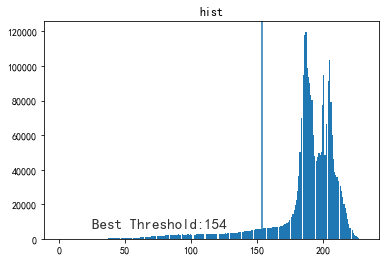

In [303]:
plt.figure()
plt.hist(img.ravel(),256)
plt.title('hist')
plt.axvline(t0)    #绘制最佳阈值分割线
plt.text(25, 6100, "Best Threshold:{}".format(t0), size = 15, alpha = 0.8)

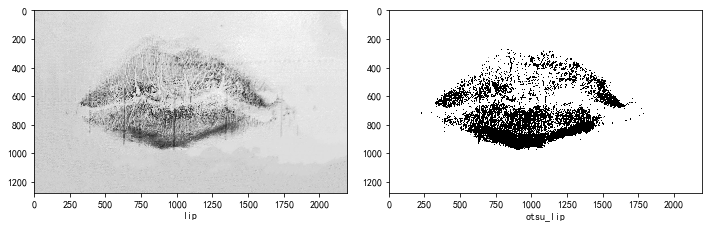

In [300]:
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(img, 'gray'),plt.xlabel('lip')
plt.subplot(122), plt.imshow(otsu_im, 'gray'),plt.xlabel('otsu_lip')
plt.tight_layout()
plt.show()

# 7.2 迭代法

In [267]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [294]:
img=cv2.imread('C:/Users/user/Desktop/lip.jpg',0)
im=np.array(img)

In [295]:
h,w=im.shape[:2]
zmin=np.min(im)
zmax=np.max(im)
t0=int((zmin+zmax)/2)
    
t1=0
res1=0
res2=0
s1=0
s2=0
    
while abs(t0-t1)>0:
        for i in range(0,h-1):
            for j in range(0,w-1):
                if im[i,j]<t0:
                    res1=res1+im[i,j]
                    s1=s1+1
                elif im[i,j]>t0:
                        res2=res2+im[i,j]
                        s2=s2+1
        avg1=res1/s1
        avg2=res2/s2
        res1=0
        res2=0
        s1=0
        s2=0
        t1=t0
        t0=int((avg1+avg2)/2)
print(t0)

154


In [296]:
im=np.where(im[...,:]<t0,0,255)

Text(25,6100,'Best Threshold:154')

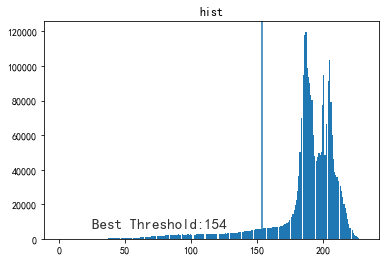

In [297]:
plt.figure()
plt.hist(img.ravel(),256)
plt.title('hist')
plt.axvline(t0)    #绘制最佳阈值分割线
plt.text(25, 6100, "Best Threshold:{}".format(t0), size = 15, alpha = 0.8)

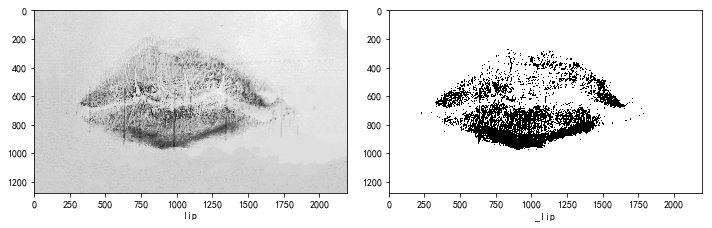

In [299]:
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(img, 'gray'),plt.xlabel('lip')
plt.subplot(122), plt.imshow(im, 'gray'),plt.xlabel('_lip')
plt.tight_layout()
plt.show()